<div style="display: flex; background-color: RGB(255,114,0); padding: 30px;" >

# MNIST 
</div>

Dans ce projet, nous utiliserons l'ensemble de données **MNIST**, qui est un ensemble de 70 000 petites images de chiffres écrits à la main par des lycéens et des employés du Bureau américain du recensement.        
Chaque image est étiquetée avec le chiffre qu'elle représente.    
Cet ensemble a été tellement étudié qu'il est souvent appelé le "hello world" de Apprentissage automatique : chaque fois que les gens proposent une nouvelle classification algorithme, ils sont curieux de voir comment il fonctionnera sur **MNIST**, et toute personne qui apprend l'apprentissage automatique s'attaque à cet ensemble de données tôt ou tard.   
**Scikit-Learn** fournit de nombreuses fonctions d'assistance pour télécharger des ensembles de données populaires.     
Le MNIST en fait partie. https://www.kaggle.com/c/digit-recognizer     
https://fr.wikipedia.org/wiki/Base_de_donn%C3%A9es_MNIST     


Avant de commancer le projet essayez de voir les cours et faire les travaux pratiques SVM.
http://cedric.cnam.fr/vertigo/cours/ml2/      

C'est un projet de classification, alors utiliser par exemple les modèles de Machine Learning de la librairie **scikit-learn** suivant: https://scikit-learn.org/stable/supervised_learning.html    

* LogisticRegression
* KNN
* SVC :
  * https://scikit-learn.org/stable/modules/svm.html#classification
  * http://cedric.cnam.fr/vertigo/cours/ml2/tpSVMLineaires.html
  * http://cedric.cnam.fr/vertigo/cours/ml2/tpMethodesNoyaux.html#machines-a-vecteurs-de-support-svm


Essayer de définir et comprendre les mots clefs de chaque algorithme

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mnist_function import *
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import time
from collections import defaultdict

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 1.Chargement des données
</div>

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- La clé **DESCR** décrivant le jeu de données

- La clé **data** contenant un tableau avec une ligne par instance et une colonne par caractéristique

- La clé **target** contenant un tableau avec les étiquettes

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 2.Exploration des données
</div>

Voir le site officiel : http://yann.lecun.com/exdb/mnist/

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
mnist.frame

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...       0.0       0.0       0.0       0.0       0.0   
2          0.0  ...       0.0       0.0       0.0       0.0       0.0   
3          0.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel781  pixel782  pixel783  pixel784  class  
0           0.0       0.0       0.0       0.0      5  
1           0.0       0.0       0.0       0.0      0  
2           0.0       0.0       0.0       0.0      4  
3           0.0       0.0       0.0       0.0      1  
4           0.0       0.0       0.0       0.0      9  
...         ...       ...       ...       ...    ...  
69995       0.0       0.0       0.0       0.0      2  
69996       0.0       0.0       0.0       0.0      3  
69997       0.0       0.0       0.0       0.0      4  
69998       0.0       0.0       0.0       0.0      5  
69999       0.0       0.0       0.0       0.0      6  

[70000 rows x 785 columns]

In [5]:
mnist.frame.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'class'],
      dtype='object', length=785)

In [6]:
# Target = class
mnist.frame['class']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
mnist.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. X et Y
</div>

In [8]:
X, y = mnist["data"], mnist["target"]

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Analyse si nettoyage ou non
</div>

In [11]:
print(f"X nan:{X.isna().sum().sum()} et Y nan:{y.isna().sum().sum()}")
X.describe(include="all")

X nan:0 et Y nan:0


pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.197414      0.099543      0.046629   
std        0.0      0.0  ...      5.991206      4.256304      2.783732   
min        0.0      0.0  ...      0.000000      0.000000      0.000000   
25%        0.0      0.0  ...      0.000000      0.000000      0.000000   
50%        0.0      0.0  ...      0.000000      0.000000      0.000000   
75%        0.0      0.0  ...      0.000000      0.000000      0.000000   
max        0.0      0.0  ...    254.000000    254.000000    253.000000   

           pixel778      pixel779      pixel780  pixel781  pixel782  pixel783  \
count  70000.000000  70000.000000  70000.000000   70000.0   70000.0   70000.0   
mean       0.016614      0.012957      0.001714       0.0       0.0       0.0   
std        1.561822      1.553796      0.320889       0.0       0.0       0.0   
min        0.000000      0.000000      0.000000       0.0       0.0       0.0   
25%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
50%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
75%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
max      253.000000    254.000000     62.000000       0.0       0.0       0.0   

       pixel784  
count   70000.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0  

[8 rows x 784 columns]

In [12]:
X.describe(include="all")

pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.197414      0.099543      0.046629   
std        0.0      0.0  ...      5.991206      4.256304      2.783732   
min        0.0      0.0  ...      0.000000      0.000000      0.000000   
25%        0.0      0.0  ...      0.000000      0.000000      0.000000   
50%        0.0      0.0  ...      0.000000      0.000000      0.000000   
75%        0.0      0.0  ...      0.000000      0.000000      0.000000   
max        0.0      0.0  ...    254.000000    254.000000    253.000000   

           pixel778      pixel779      pixel780  pixel781  pixel782  pixel783  \
count  70000.000000  70000.000000  70000.000000   70000.0   70000.0   70000.0   
mean       0.016614      0.012957      0.001714       0.0       0.0       0.0   
std        1.561822      1.553796      0.320889       0.0       0.0       0.0   
min        0.000000      0.000000      0.000000       0.0       0.0       0.0   
25%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
50%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
75%        0.000000      0.000000      0.000000       0.0       0.0       0.0   
max      253.000000    254.000000     62.000000       0.0       0.0       0.0   

       pixel784  
count   70000.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0  

[8 rows x 784 columns]

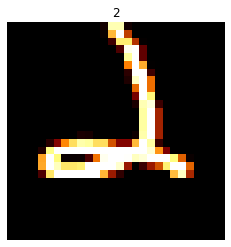

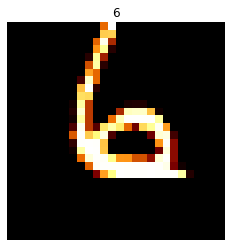

In [13]:
show_digit(X.values[12352], y[12352])
show_digit(X.values[12905], y[12905])

<div style="display: flex; background-color: indigo;" >

#### Conclusion
</div>

La suppression des pixels blancs en début et fin ne semble pas pertinente

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.4. Typage / Encodage
</div>

**Notez que target est une chaîne. La plupart des algorithmes de ML attendent des chiffres, alors allons-y convertir y en entier :**

In [14]:
y = y.astype(np.uint8)

In [15]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [16]:
encoder = OneHotEncoder(sparse=False)
transformed = encoder.fit_transform(pd.DataFrame(y))
print(transformed.shape)
transformed

(70000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
#Create a Pandas DataFrame of the hot encoded column
ohe_df = pd.DataFrame(transformed, columns=encoder.get_feature_names_out())
print("ohe_df:", ohe_df.shape, "y:", y.shape)

ohe_df: (70000, 10) y: (70000,)


In [39]:
#concat with original data
Y_df = pd.concat([y, ohe_df], axis=1)
print("ohe_df:", ohe_df.shape, "y:", y.shape, "data_encode:", Y_df.shape)
Y_df.head()

ohe_df: (70000, 10) y: (70000,) data_encode: (70000, 11)


class  class_0  class_1  class_2  class_3  class_4  class_5  class_6  \
0      5      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
1      0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      4      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
3      1      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
4      9      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   class_7  class_8  class_9  
0      0.0      0.0      0.0  
1      0.0      0.0      0.0  
2      0.0      0.0      0.0  
3      0.0      0.0      0.0  
4      0.0      0.0      1.0

Mais attendez! Vous devez toujours créer une campagne de test et la mettre de côté avant d'inspecter les données de près. Le jeu de données **MNIST** est en fait déjà divisé en un ensemble d'apprentissage (les 60 000 premières images) et un ensemble de tests (les 10 000 dernières images):

In [49]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y_df[:60000], Y_df[60000:]
X_train.shape

(60000, 784)

In [50]:
Y_train

class  class_0  class_1  class_2  class_3  class_4  class_5  class_6  \
0          5      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
1          0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2          4      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
3          1      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
4          9      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
59995      8      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
59996      3      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
59997      5      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
59998      6      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
59999      8      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

       class_7  class_8  class_9  
0          0.0      0.0      0.0  
1          0.0      0.0      0.0  
2          0.0      0.0      0.0  
3          0.0      0.0      0.0  
4          0.0      0.0      1.0  
...        ...      ...      ...  
59995      0.0      1.0      0.0  
59996      0.0      0.0      0.0  
59997      0.0      0.0      0.0  
59998      0.0      0.0      0.0  
59999      0.0      1.0      0.0  

[60000 rows x 11 columns]

In [51]:
Y_test

class  class_0  class_1  class_2  class_3  class_4  class_5  class_6  \
60000      7      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
60001      2      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
60002      1      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
60003      0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
60004      4      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
69995      2      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
69996      3      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
69997      4      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
69998      5      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
69999      6      0.0      0.0      0.0      0.0      0.0      0.0      1.0   

       class_7  class_8  class_9  
60000      1.0      0.0      0.0  
60001      0.0      0.0      0.0  
60002      0.0      0.0      0.0  
60003      0.0      0.0      0.0  
60004      0.0      0.0      0.0  
...        ...      ...      ...  
69995      0.0      0.0      0.0  
69996      0.0      0.0      0.0  
69997      0.0      0.0      0.0  
69998      0.0      0.0      0.0  
69999      0.0      0.0      0.0  

[10000 rows x 11 columns]

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.5. Visualisation
</div>

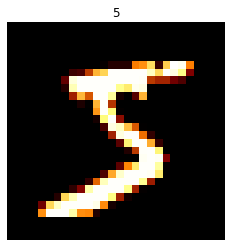

In [22]:
show_digit(X.values[0], y[0])
plt.show()

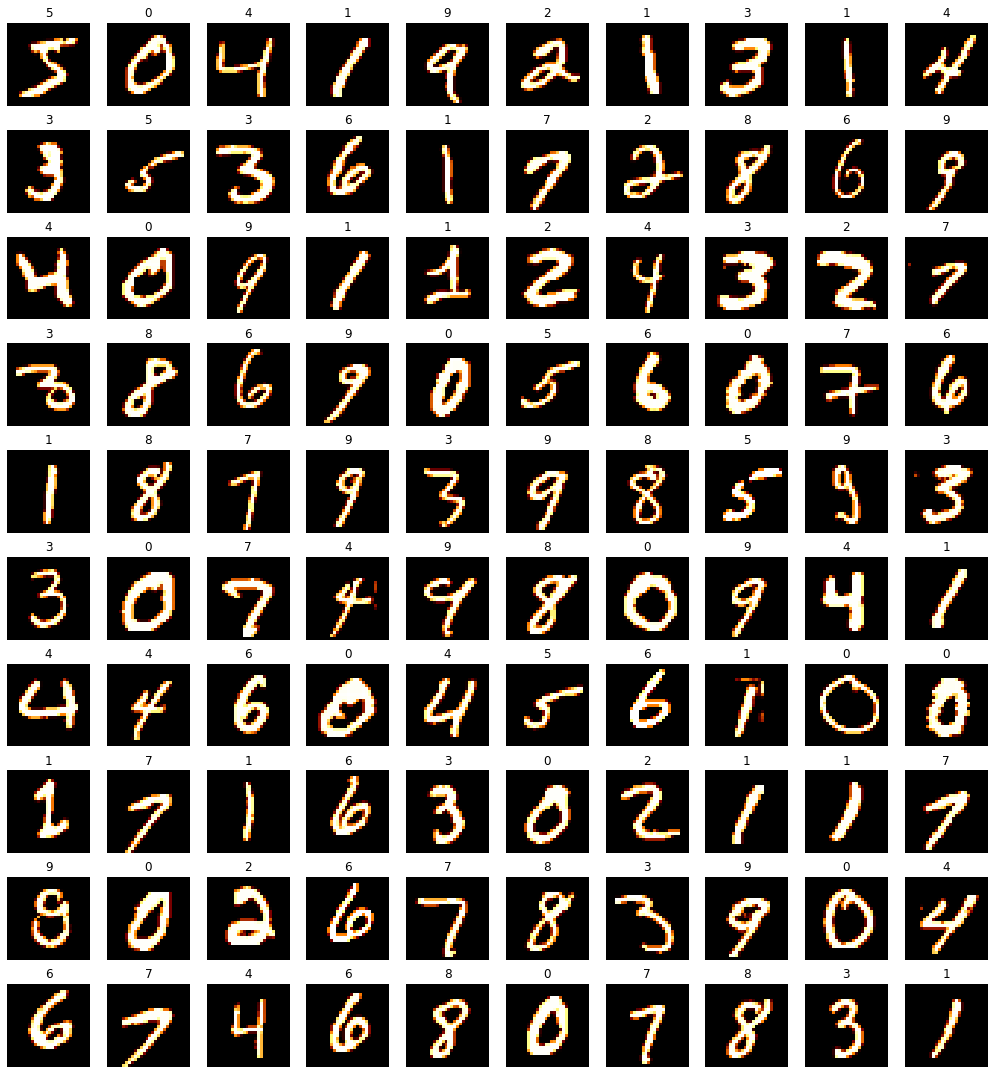

In [23]:
draw_digits(X, y, 100)

<div style="display: flex; background-color: indigo;" >

#### 2.5.2. Représentation graphique possible : via ACP ?
</div>

L'objectif est simplement d'être capable de réduire les données pour les représenter graphiquement

In [24]:
# ACP
pca = PCA(n_components=2)
acp_projection = pca.fit_transform(X_test)

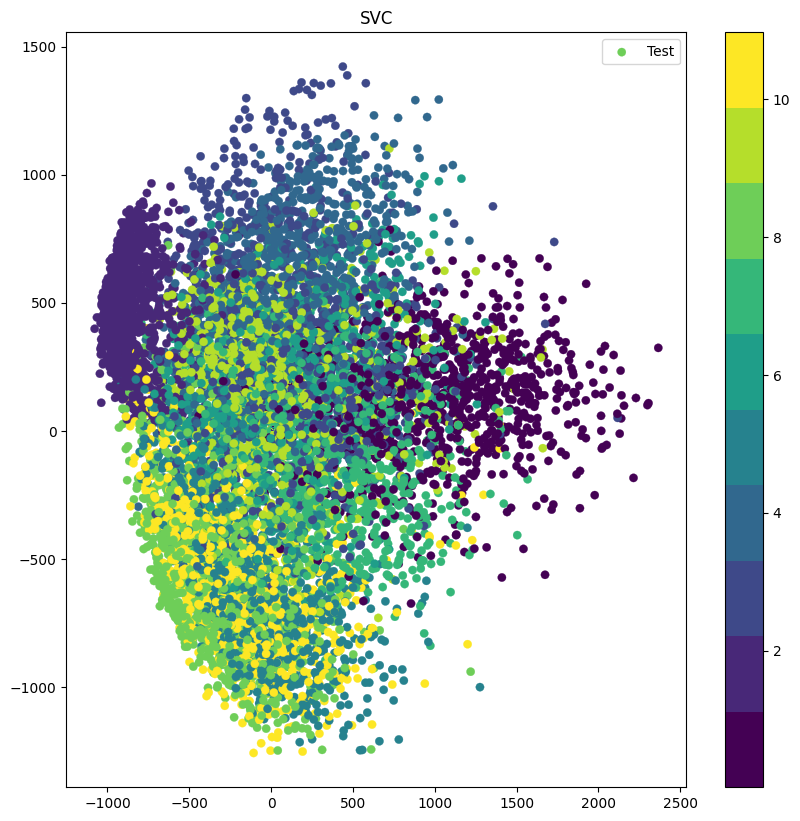

In [25]:
draw_predict(X_test, Y_test['class'], None, title="SVC", projection=acp_projection)

<div style="display: flex; background-color: indigo;" >

#### 2.5.3. Représentation graphique possible : via Isomap ?
</div>

L'objectif est simplement d'être capable de réduire les données pour les représenter graphiquement

In [26]:
from sklearn.manifold import Isomap

In [27]:
iso = Isomap(n_components=2)
projection = iso.fit_transform(X_test)

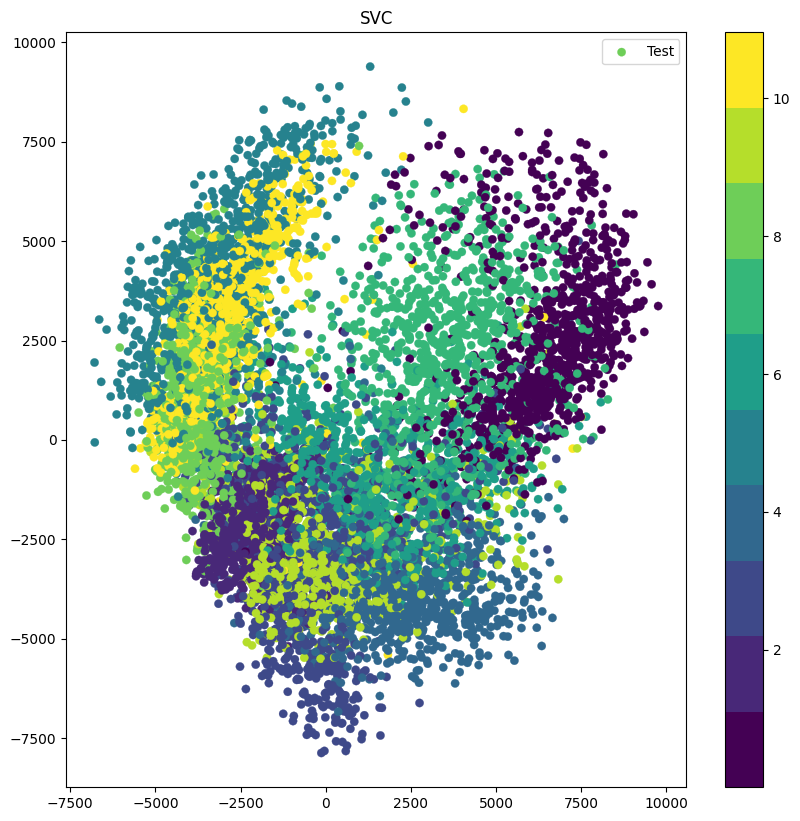

In [28]:
draw_predict(X_test, Y_test['class'], None, title="SVC", projection=projection)

<div style="display: flex; background-color: indigo;" >

#### 2.5.4. Représentation graphique possible : TSNE
</div>

L'objectif est simplement d'être capable de réduire les données pour les représenter graphiquement

In [29]:
#PCA
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300, init='random', learning_rate=200.0).fit_transform(X_train)

In [30]:
import seaborn as sns

In [31]:
df = pd.DataFrame()
df["y"] = Y_train["class"]
df["comp-1"] = tsne[:, 0]
df["comp-2"] = tsne[:, 1]
rows, cols = df.shape

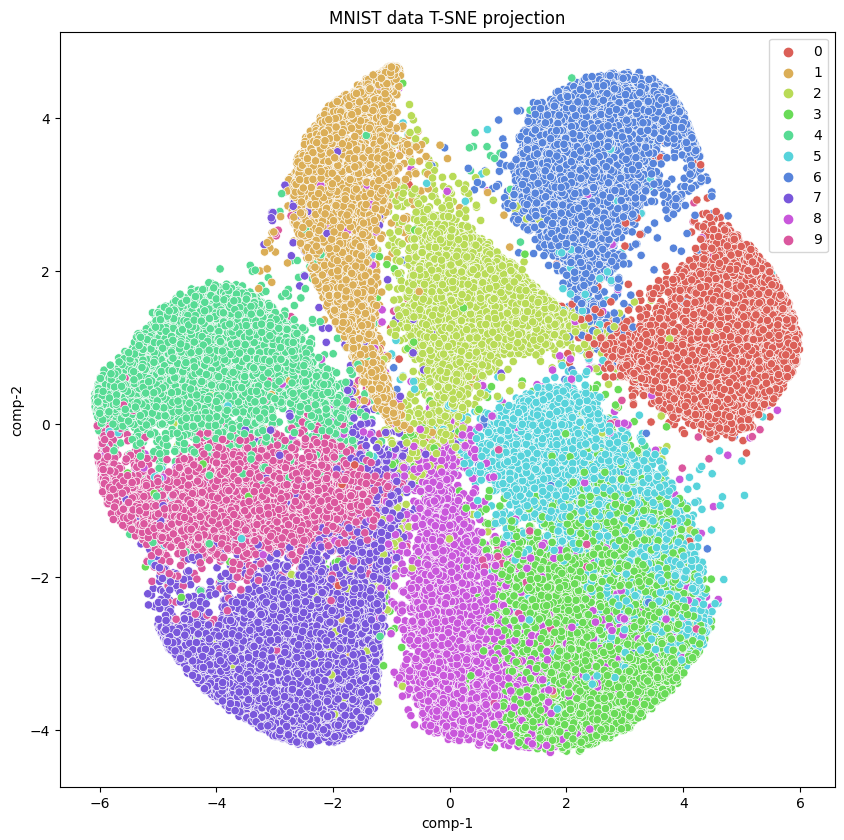

In [32]:
figure, axe = color_graph_background()
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")
figure.set_size_inches(10, 10, forward=True)
figure.set_dpi(100)

In [83]:
y_st = df["y"].astype("object")
y_st

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: y, Length: 60000, dtype: object

In [98]:
df.columns

Index(['y', 'comp-1', 'comp-2'], dtype='object')

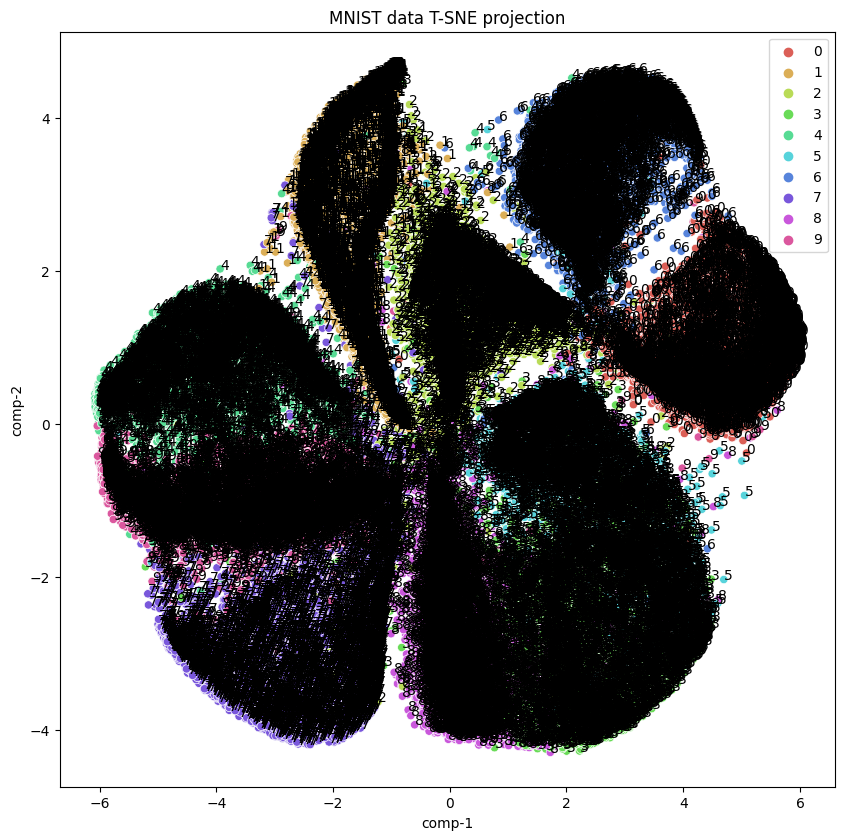

In [99]:
figure, axe = color_graph_background()
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")
#plt.text(df["comp-1"], df[ "comp-2"], y_st.values.all)
for i in range(df.shape[0]):
    plt.text(df.iloc[i,1], df.iloc[i,2], df.iloc[i,0])

figure.set_size_inches(10, 10, forward=True)
figure.set_dpi(100)

<div style="display: flex; background-color: Blue; padding: 15px;" >

## Problème 1 : Classification binaire
</div>

Simplifions le problème pour l'instant et essayons seulement d'identifier un chiffre, par
exemple, le nombre 5. Ce "5-détecteur" sera un exemple d'un binaire
classificateur, capable de distinguer seulement deux classes, 5 et non-5.


* LogisticRegression
* KNN
* SVC

In [52]:
models_list = { }
Y_train.columns

Index(['class', 'class_0', 'class_1', 'class_2', 'class_3', 'class_4',
       'class_5', 'class_6', 'class_7', 'class_8', 'class_9'],
      dtype='object')

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.2. Test pour 1 chiffre
</div>

In [53]:
y_column_name='class_0'
random_state=0
verbose=0

In [54]:
def get_model_list(random_state=0, n_neighbors=3, verbose=0):
    model_list = {"Logistic":LogisticRegression(random_state=random_state, verbose=verbose),
                  "SVC OVO":svm.SVC(random_state=random_state, verbose=verbose),
                  "KNN":KNeighborsClassifier(n_neighbors=n_neighbors),
                  }
    return model_list

In [55]:
model_list = get_model_list(verbose=verbose)

In [56]:
modeldic, scores = fit_and_test_models(model_list, X_train, Y_train, X_test, Y_test, y_column_name=y_column_name, verbose=verbose, metrics=2)
score_df = pd.DataFrame(scores).set_index("Modeli")
score_df

Class     Model      R2  fit time  fit seconde  \
Modeli                                                               
class_0-Logistic  class_0  Logistic  0.9922  00:00:04     4.682187   
class_0-SVC OVO   class_0   SVC OVO  0.9977  00:01:03    63.285574   
class_0-KNN       class_0       KNN  0.9970  00:00:11    11.719337   

                 metrics time  metrics seconde predict time  predict seconde  \
Modeli                                                                         
class_0-Logistic     00:00:00         0.060736     00:00:00         0.014017   
class_0-SVC OVO      00:00:07         7.800198     00:00:07         7.779208   
class_0-KNN          00:00:23        23.111537     00:00:11        11.574625   

                     MAE  ...  Brier  loss  Log loss  F1 micro  F1 macro  \
Modeli                    ...                                              
class_0-Logistic  0.0078  ...     0.006266  0.026424    0.9922  0.978080   
class_0-SVC OVO   0.0023  ...          NaN       NaN    0.9977  0.993474   
class_0-KNN       0.0030  ...     0.002689  0.055363    0.9970  0.991584   

                  F1 weighted  Recall micro  Recall macro  Recall weighted  \
Modeli                                                                       
class_0-Logistic     0.992225        0.9922      0.981124           0.9922   
class_0-SVC OVO      0.997696        0.9977      0.991903           0.9977   
class_0-KNN          0.997012        0.9970      0.995608           0.9970   

                  Roc auc ovo  Roc auc ovr  
Modeli                                      
class_0-Logistic     0.981124     0.981124  
class_0-SVC OVO      0.991903     0.991903  
class_0-KNN          0.995608     0.995608  

[3 rows x 23 columns]

<div style="display: flex; background-color: Green; padding: 7px;" >

### 3.3. Test pour tous les chiffres
</div>

In [57]:
# Pour éviter de déclencher la cellule ci-dessous car il est long,
# l'objectif étant toute fois de garder les traces de la dernière exécution
# just to fail

In [58]:
verbose=0
modeldic_full = {}

# ajout des données du modèle y_column_name
col_name_ever_done = False
if modeldic is not None:
    modeldic_full.update(modeldic)
    col_name_ever_done=True
if scores is None:
    scores = defaultdict(list)
    col_name_ever_done=True

for col in Y_train.columns:
    # pour éviter de refaire le traitement déjà réalisé sur un chiffre
    if col != 'class' and (col != y_column_name or not col_name_ever_done):
        if verbose:
            print(col)
        
        modeldic, scores = fit_and_test_models(get_model_list(verbose=verbose), X_train, Y_train, X_test, Y_test, y_column_name=col, scores=scores, verbose=verbose, metrics=2)
        modeldic_full.update(modeldic)
        if verbose:
            print("----------------------------")
score_all_class_df = pd.DataFrame(scores).set_index("Modeli")
score_all_class_df.round(decimals=3)
score_all_class_df

Class     Model      R2  fit time  fit seconde  \
Modeli                                                               
class_0-Logistic  class_0  Logistic  0.9922  00:00:04     4.682187   
class_0-SVC OVO   class_0   SVC OVO  0.9977  00:01:03    63.285574   
class_0-KNN       class_0       KNN  0.9970  00:00:11    11.719337   
class_1-Logistic  class_1  Logistic  0.9933  00:00:04     4.415731   
class_1-SVC OVO   class_1   SVC OVO  0.9981  00:00:35    35.328653   
class_1-KNN       class_1       KNN  0.9959  00:00:11    11.617618   
class_2-Logistic  class_2  Logistic  0.9802  00:00:04     4.523515   
class_2-SVC OVO   class_2   SVC OVO  0.9947  00:02:16   136.491786   
class_2-KNN       class_2       KNN  0.9946  00:00:11    11.565320   
class_3-Logistic  class_3  Logistic  0.9761  00:00:04     4.228129   
class_3-SVC OVO   class_3   SVC OVO  0.9953  00:02:50   170.691945   
class_3-KNN       class_3       KNN  0.9937  00:00:11    11.860868   
class_4-Logistic  class_4  Logistic  0.9834  00:00:04     4.253248   
class_4-SVC OVO   class_4   SVC OVO  0.9954  00:01:45   105.469885   
class_4-KNN       class_4       KNN  0.9945  00:00:11    11.744490   
class_5-Logistic  class_5  Logistic  0.9779  00:00:04     4.279657   
class_5-SVC OVO   class_5   SVC OVO  0.9956  00:02:34   154.128974   
class_5-KNN       class_5       KNN  0.9938  00:00:11    11.680331   
class_6-Logistic  class_6  Logistic  0.9849  00:00:04     4.310792   
class_6-SVC OVO   class_6   SVC OVO  0.9965  00:01:01    61.371997   
class_6-KNN       class_6       KNN  0.9970  00:00:11    11.911566   
class_7-Logistic  class_7  Logistic  0.9833  00:00:04     4.231004   
class_7-SVC OVO   class_7   SVC OVO  0.9929  00:01:19    79.305098   
class_7-KNN       class_7       KNN  0.9927  00:00:11    11.730734   
class_8-Logistic  class_8  Logistic  0.9464  00:00:04     4.145033   
class_8-SVC OVO   class_8   SVC OVO  0.9937  00:03:06   186.189393   
class_8-KNN       class_8       KNN  0.9930  00:00:11    11.728129   
class_9-Logistic  class_9  Logistic  0.9629  00:00:04     4.430110   
class_9-SVC OVO   class_9   SVC OVO  0.9913  00:02:39   159.672639   
class_9-KNN       class_9       KNN  0.9919  00:00:11    11.746336   

                 metrics time  metrics seconde predict time  predict seconde  \
Modeli                                                                         
class_0-Logistic     00:00:00         0.060736     00:00:00         0.014017   
class_0-SVC OVO      00:00:07         7.800198     00:00:07         7.779208   
class_0-KNN          00:00:23        23.111537     00:00:11        11.574625   
class_1-Logistic     00:00:00         0.051495     00:00:00         0.012917   
class_1-SVC OVO      00:00:05         5.436099     00:00:05         5.412973   
class_1-KNN          00:00:23        23.369344     00:00:11        11.702521   
class_2-Logistic     00:00:00         0.049746     00:00:00         0.011748   
class_2-SVC OVO      00:00:14        14.306669     00:00:14        14.285686   
class_2-KNN          00:00:23        23.934457     00:00:11        11.860215   
class_3-Logistic     00:00:00         0.053160     00:00:00         0.013006   
class_3-SVC OVO      00:00:16        16.792499     00:00:16        16.770412   
class_3-KNN          00:00:23        23.561175     00:00:11        11.815648   
class_4-Logistic     00:00:00         0.050693     00:00:00         0.013000   
class_4-SVC OVO      00:00:13        13.264391     00:00:13        13.243403   
class_4-KNN          00:00:23        23.240387     00:00:11        11.651209   
class_5-Logistic     00:00:00         0.050003     00:00:00         0.011998   
class_5-SVC OVO      00:00:16        16.044519     00:00:16        16.022116   
class_5-KNN          00:00:23        23.485840     00:00:11        11.787061   
class_6-Logistic     00:00:00         0.049601     00:00:00         0.011995   
class_6-SVC OVO      00:00:09         9.595342     00:00:09         9.573344   
class_6-KNN        

<div style="display: flex; background-color: Green; padding: 7px;" >

### 4.1. Test pour tous les chiffres ensemble
</div>

Test sans paramétrage particulier

In [59]:
verbose=0
y_column_name='class'

In [60]:
modeldic_all, scores = fit_and_test_models(get_model_list(verbose=verbose), X_train, Y_train, X_test, Y_test, y_column_name=y_column_name, scores=scores, verbose=verbose, metrics=2)
modeldic_full.update(modeldic_all)

score_all_class_df = pd.DataFrame(scores).set_index("Modeli")
score_all_class_df.round(decimals=3)
score_all_class_df

Class     Model      R2  fit time  fit seconde  \
Modeli                                                               
class_0-Logistic  class_0  Logistic  0.9922  00:00:04     4.682187   
class_0-SVC OVO   class_0   SVC OVO  0.9977  00:01:03    63.285574   
class_0-KNN       class_0       KNN  0.9970  00:00:11    11.719337   
class_1-Logistic  class_1  Logistic  0.9933  00:00:04     4.415731   
class_1-SVC OVO   class_1   SVC OVO  0.9981  00:00:35    35.328653   
class_1-KNN       class_1       KNN  0.9959  00:00:11    11.617618   
class_2-Logistic  class_2  Logistic  0.9802  00:00:04     4.523515   
class_2-SVC OVO   class_2   SVC OVO  0.9947  00:02:16   136.491786   
class_2-KNN       class_2       KNN  0.9946  00:00:11    11.565320   
class_3-Logistic  class_3  Logistic  0.9761  00:00:04     4.228129   
class_3-SVC OVO   class_3   SVC OVO  0.9953  00:02:50   170.691945   
class_3-KNN       class_3       KNN  0.9937  00:00:11    11.860868   
class_4-Logistic  class_4  Logistic  0.9834  00:00:04     4.253248   
class_4-SVC OVO   class_4   SVC OVO  0.9954  00:01:45   105.469885   
class_4-KNN       class_4       KNN  0.9945  00:00:11    11.744490   
class_5-Logistic  class_5  Logistic  0.9779  00:00:04     4.279657   
class_5-SVC OVO   class_5   SVC OVO  0.9956  00:02:34   154.128974   
class_5-KNN       class_5       KNN  0.9938  00:00:11    11.680331   
class_6-Logistic  class_6  Logistic  0.9849  00:00:04     4.310792   
class_6-SVC OVO   class_6   SVC OVO  0.9965  00:01:01    61.371997   
class_6-KNN       class_6       KNN  0.9970  00:00:11    11.911566   
class_7-Logistic  class_7  Logistic  0.9833  00:00:04     4.231004   
class_7-SVC OVO   class_7   SVC OVO  0.9929  00:01:19    79.305098   
class_7-KNN       class_7       KNN  0.9927  00:00:11    11.730734   
class_8-Logistic  class_8  Logistic  0.9464  00:00:04     4.145033   
class_8-SVC OVO   class_8   SVC OVO  0.9937  00:03:06   186.189393   
class_8-KNN       class_8       KNN  0.9930  00:00:11    11.728129   
class_9-Logistic  class_9  Logistic  0.9629  00:00:04     4.430110   
class_9-SVC OVO   class_9   SVC OVO  0.9913  00:02:39   159.672639   
class_9-KNN       class_9       KNN  0.9919  00:00:11    11.746336   
class-Logistic      class  Logistic  0.9255  00:00:18    18.277897   
class-SVC OVO       class   SVC OVO  0.9792  00:03:59   239.258969   
class-KNN           class       KNN  0.9705  00:00:11    11.862727   

                 metrics time  metrics seconde predict time  predict seconde  \
Modeli                                                                         
class_0-Logistic     00:00:00         0.060736     00:00:00         0.014017   
class_0-SVC OVO      00:00:07         7.800198     00:00:07         7.779208   
class_0-KNN          00:00:23        23.111537     00:00:11        11.574625   
class_1-Logistic     00:00:00         0.051495     00:00:00         0.012917   
class_1-SVC OVO      00:00:05         5.436099     00:00:05         5.412973   
class_1-KNN          00:00:23        23.369344     00:00:11        11.702521   
class_2-Logistic     00:00:00         0.049746     00:00:00         0.011748   
class_2-SVC OVO      00:00:14        14.306669     00:00:14        14.285686   
class_2-KNN          00:00:23        23.934457     00:00:11        11.860215   
class_3-Logistic     00:00:00         0.053160     00:00:00         0.013006   
class_3-SVC OVO      00:00:16        16.792499     00:00:16        16.770412   
class_3-KNN          00:00:23        23.561175     00:00:11        11.815648   
class_4-Logistic     00:00:00         0.050693     00:00:00         0.013000   
class_4-SVC OVO      00:00:13        13.264391     00:00:13        13.243403   
class_4-KNN          00:00:23        23.240387     00:00:11        11.651209   
class_5-Logistic     00:00:00         0.050003     00:00:00         0.011998   
class_5-SVC OVO      00:00:16        16.044519     00:00:16        16.022116   
class_5-KNN          00:00:23        23.485840   

<div style="display: flex; background-color: indigo;" >

#### 4.2.2. R2 et temps d'exécution
</div>

In [61]:
score_all_class_df["Total use seconde"] = score_all_class_df["fit seconde"] + score_all_class_df["predict seconde"]

In [62]:
score_all_class_df["Total use seconde"].head()

Modeli
class_0-Logistic     4.696204
class_0-SVC OVO     71.064782
class_0-KNN         23.293962
class_1-Logistic     4.428648
class_1-SVC OVO     40.741626
Name: Total use seconde, dtype: float64

In [63]:
score_all_class_df["Total use time"] = score_all_class_df["Total use seconde"].apply(lambda x: time.strftime("%H:%M:%S", time.gmtime(x)))

In [64]:
best = score_all_class_df.sort_values(by=["R2", "Total use time"], ascending=False).drop_duplicates('Class', keep='first')

best[['Class', 'Model', 'R2', 'Total use time', 'metrics time',
       'MAE', 'MSE',  'RMSE', 'Mediane AE', 'Brier  loss', 'Log loss', 'F1 micro', 'F1 macro',
       'F1 weighted', 'Recall micro', 'Recall macro', 'Recall weighted',
       'Roc auc ovo', 'Roc auc ovr']]

Class    Model      R2 Total use time metrics time     MAE  \
Modeli                                                                          
class_1-SVC OVO  class_1  SVC OVO  0.9981       00:00:40     00:00:05  0.0019   
class_0-SVC OVO  class_0  SVC OVO  0.9977       00:01:11     00:00:07  0.0023   
class_6-KNN      class_6      KNN  0.9970       00:00:23     00:00:23  0.0030   
class_5-SVC OVO  class_5  SVC OVO  0.9956       00:02:50     00:00:16  0.0044   
class_4-SVC OVO  class_4  SVC OVO  0.9954       00:01:58     00:00:13  0.0046   
class_3-SVC OVO  class_3  SVC OVO  0.9953       00:03:07     00:00:16  0.0047   
class_2-SVC OVO  class_2  SVC OVO  0.9947       00:02:30     00:00:14  0.0053   
class_8-SVC OVO  class_8  SVC OVO  0.9937       00:03:25     00:00:19  0.0063   
class_7-SVC OVO  class_7  SVC OVO  0.9929       00:01:31     00:00:12  0.0071   
class_9-KNN      class_9      KNN  0.9919       00:00:23     00:00:23  0.0081   
class-SVC OVO      class  SVC OVO  0.9792       00:05:02     00:01:03  2.9810   

                    MSE      RMSE  Mediane AE  Brier  loss  Log loss  \
Modeli                                                                 
class_1-SVC OVO  0.0019  0.043589         0.0          NaN       NaN   
class_0-SVC OVO  0.0023  0.047958         0.0          NaN       NaN   
class_6-KNN      0.0030  0.054772         0.0     0.002589  0.045573   
class_5-SVC OVO  0.0044  0.066332         0.0          NaN       NaN   
class_4-SVC OVO  0.0046  0.067823         0.0          NaN       NaN   
class_3-SVC OVO  0.0047  0.068557         0.0          NaN       NaN   
class_2-SVC OVO  0.0053  0.072801         0.0          NaN       NaN   
class_8-SVC OVO  0.0063  0.079373         0.0          NaN       NaN   
class_7-SVC OVO  0.0071  0.084261         0.0          NaN       NaN   
class_9-KNN      0.0081  0.090000         0.0     0.006844  0.102413   
class-SVC OVO    0.4148  0.644050         0.0          NaN       NaN   

                 F1 micro  F1 macro  F1 weighted  Recall micro  Recall macro  \
Modeli                                                                         
class_1-SVC OVO    0.9981  0.995263     0.998097        0.9981      0.993551   
class_0-SVC OVO    0.9977  0.993474     0.997696        0.9977      0.991903   
class_6-KNN        0.9970  0.991350     0.997001        0.9970      0.991808   
class_5-SVC OVO    0.9956  0.986251     0.995566        0.9956      0.978876   
class_4-SVC OVO    0.9954  0.986871     0.995375        0.9954      0.981569   
class_3-SVC OVO    0.9953  0.986927     0.995276        0.9953      0.982006   
class_2-SVC OVO    0.9947  0.985515     0.994669        0.9947      0.979895   
class_8-SVC OVO    0.9937  0.981860     0.993660        0.9937      0.975902   
class_7-SVC OVO    0.9929  0.980460     0.992845        0.9929      0.973219   
class_9-KNN        0.9919  0.977669     0.991898        0.9919      0.977458   
class-SVC OVO      0.9792  0.979130     0.979186        0.9792      0.979092   

                 Recall weighted  Roc auc ovo  Roc auc ovr  
Modeli                                                      
class_1-SVC OVO           0.9981     0.993551     0.993551  
class_0-SVC OVO           0.9977     0.991903     0.991903  
class_6-KNN               0.9970     0.991808     0.991808  
class_5-SVC OVO           0.9956     0.978876     0.978876  
class_4-SVC OVO           0.9954     0.981569     0.981569  
class_3-SVC OVO           0.9953     0.982006     0.982006  
class_2-SVC OVO           0.9947     0.979895     0.979895  
class_8-SVC OVO           0.9937     0.975902     0.975902  
class_7-SVC OVO           0.9929     0.973219     0.973219  
class_9-KNN               0.9919     0.977458     0.977458  
class-SVC OVO             0.9792          NaN          NaN

In [65]:
scores.keys()

dict_keys(['Class', 'Model', 'Modeli', 'R2', 'fit time', 'fit seconde', 'metrics time', 'metrics seconde', 'predict time', 'predict seconde', 'MAE', 'MSE', 'RMSE', 'Mediane AE', 'Brier  loss', 'Log loss', 'F1 micro', 'F1 macro', 'F1 weighted', 'Recall micro', 'Recall macro', 'Recall weighted', 'Roc auc ovo', 'Roc auc ovr'])

In [66]:
model_svc = modeldic_all[y_column_name+"-SVC OVO"]
model_knn = modeldic_all[y_column_name+"-KNN"]
model_logistic = modeldic_all[y_column_name+"-Logistic"]

A ce stade les scores sont déjà très bons.

In [67]:
y_predict_svc = model_svc.predict(X_test)

<Figure size 1296x1080 with 0 Axes>

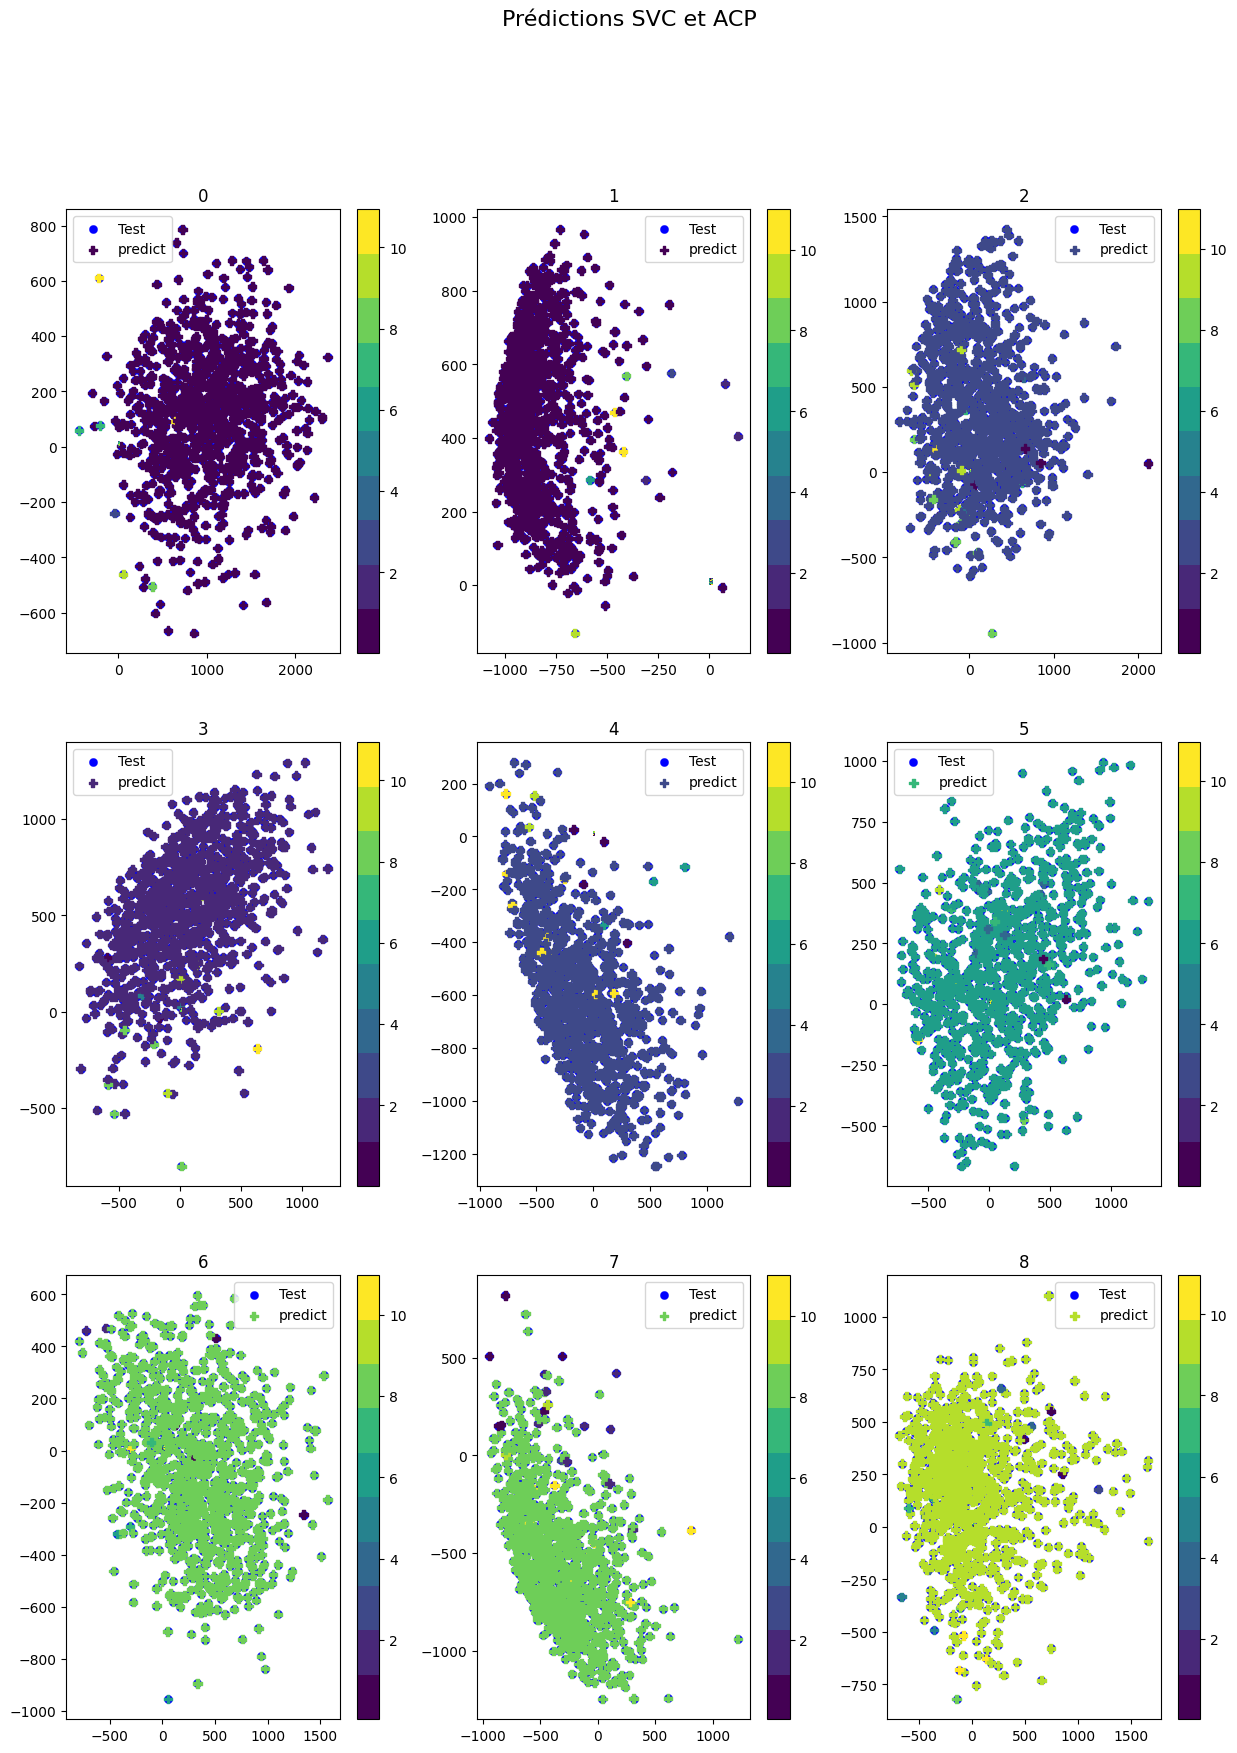

In [68]:
draw_all_predict(X_test, Y_test[y_column_name], y_predict_svc, title="Prédictions SVC et ACP", projection=acp_projection)

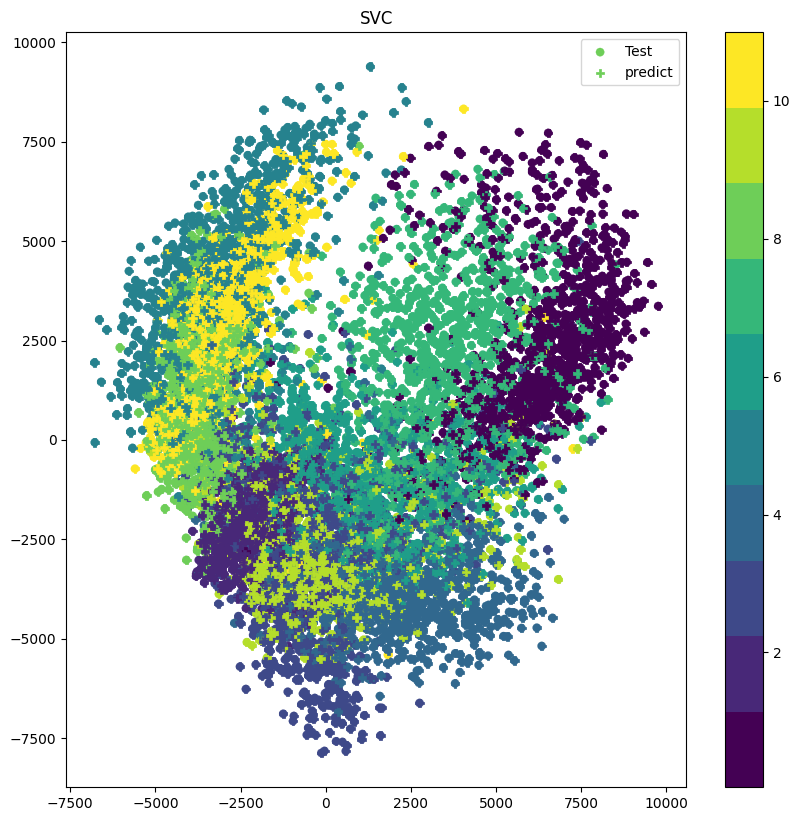

In [69]:
draw_predict(X_test, Y_test[y_column_name], y_predict_svc, title="SVC", projection=projection)

<Figure size 1296x1080 with 0 Axes>

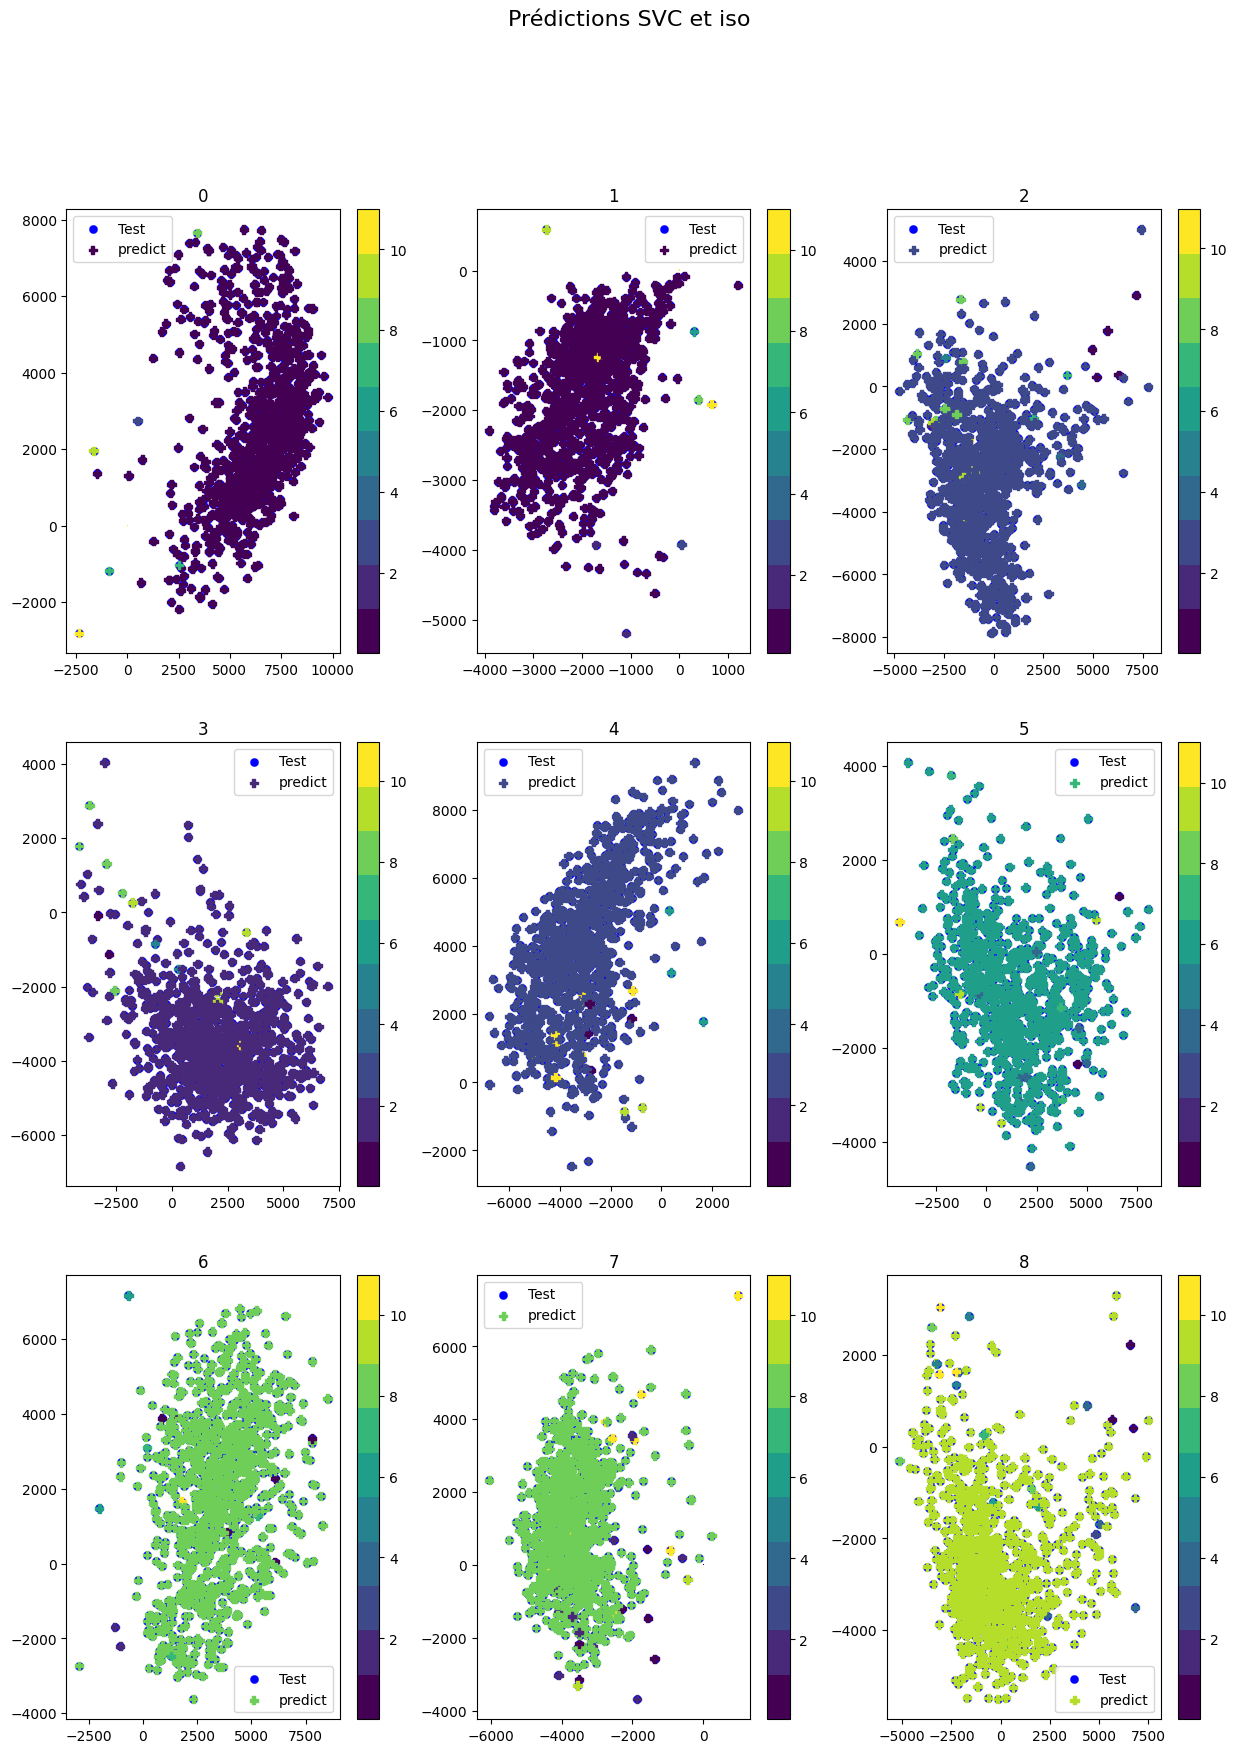

In [70]:
draw_all_predict(X_test, Y_test['class'], y_predict_svc, title="Prédictions SVC et iso", projection=projection)

In [71]:
y_predict_knn = model_knn.predict(X_test)

<div style="display: flex; background-color: indigo;" >

#### 4.1.2. Matrice de confusion
</div

In [72]:
predictions_dic = {"SVC":(model_svc, y_predict_svc), "KNN":(model_knn,y_predict_knn)}

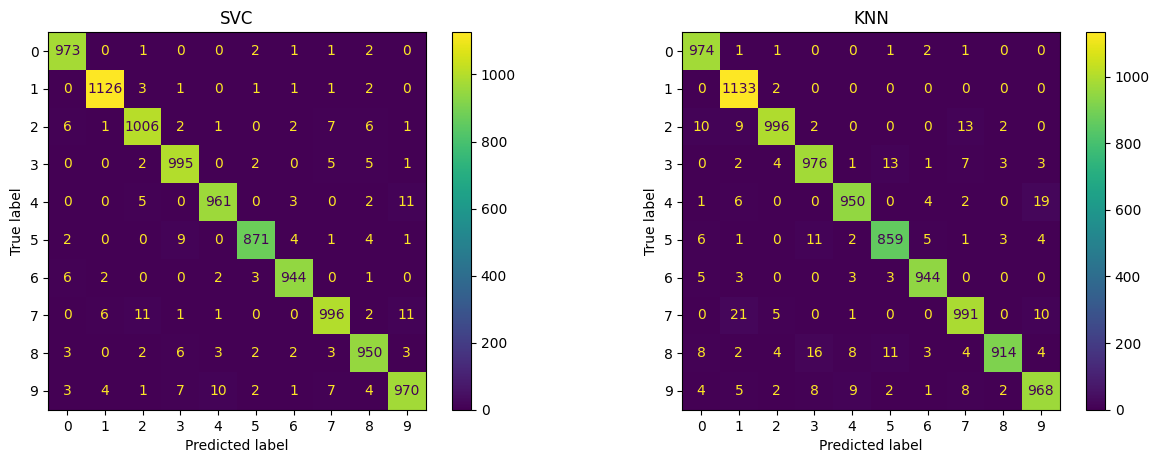

In [73]:
draw_confusion(Y_test[y_column_name], predictions_dic)

<div style="display: flex; background-color: indigo;" >

#### 4.1.4. PrecisionRecall et RocCurveDisplay
</div>

In [74]:
y_score = model_svc.decision_function(X_test)
y_score

array([[ 3.80895496, -0.30212376,  6.19343167, ...,  9.31783975,
         2.75699419,  7.28292338],
       [ 4.18553231,  4.18761078,  9.31442588, ..., -0.31459029,
         5.28430293,  1.69121956],
       [-0.30737409,  9.30985733,  7.22657291, ...,  8.27340301,
         6.2658673 ,  2.74423466],
       ...,
       [ 0.69383538, -0.30657546,  2.71090038, ...,  6.27292798,
         7.30014128,  8.3054091 ],
       [ 5.77650505,  2.74581705,  1.7213734 , ..., -0.29335033,
         8.30520036,  0.70817749],
       [ 6.20908778, -0.30250671,  8.29122329, ...,  0.69621888,
         3.75120338,  2.72899814]])